In [21]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [23]:
data= pd.read_csv("bbc-text.csv")
data

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


# Understanding features and target variables

In [26]:
data['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [27]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [28]:
data.shape

(2225, 2)

# Checking for null values

In [29]:
data.isnull().sum()

category    0
text        0
dtype: int64

# Countplot for Target Variables

<AxesSubplot:xlabel='category', ylabel='count'>

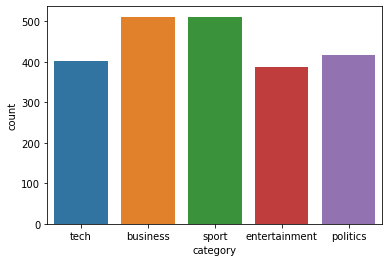

In [31]:
sns.countplot(data.category)

In [33]:
data['News_length'] = data['text'].str.len()
print(data['News_length'])

0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: News_length, Length: 2225, dtype: int64


# Distribution Plot

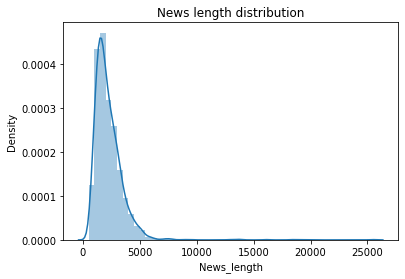

In [34]:
sns.distplot(data['News_length']).set_title('News length distribution');

# Wordcloud

In [35]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

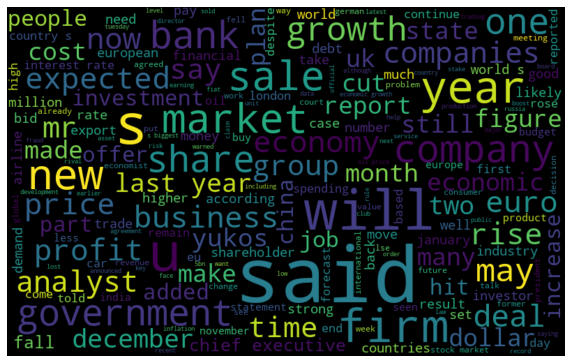

In [38]:
subset=data[data.category=="business"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

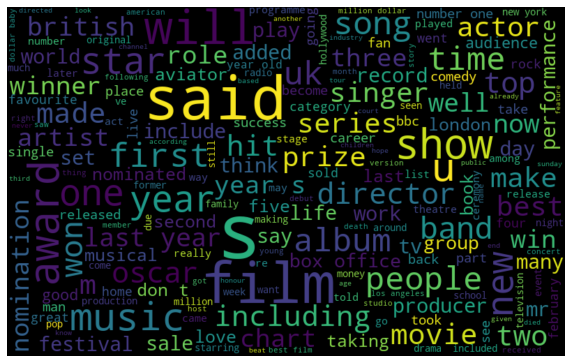

In [40]:
subset=data[data.category=="entertainment"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

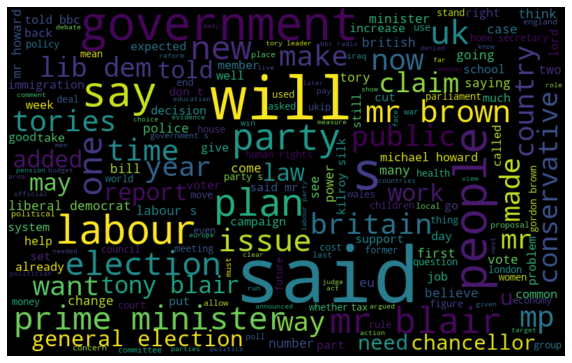

In [42]:
subset=data[data.category=="politics"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

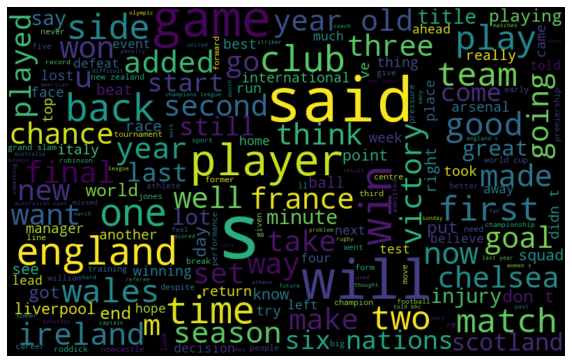

In [44]:
subset=data[data.category=="sport"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

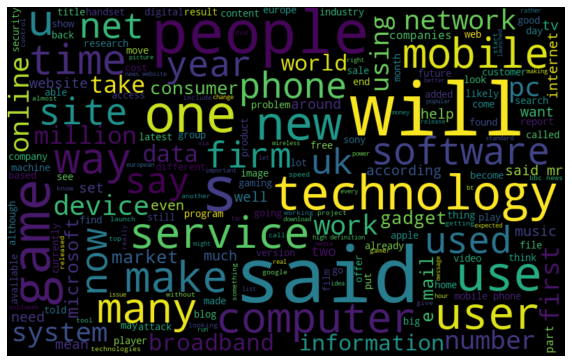

In [46]:
subset=data[data.category=="tech"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

# Data Preprocessing

In [47]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [48]:
data['Text_parsed'] = data['text'].apply(process_text)

In [49]:
data.head()

,category,text,News_length,Text_parsed
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...


# Label Encoder

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
Label_Encoder= LabelEncoder()
data["category"]= Label_Encoder.fit_transform(data["category"])
data

,category,text,News_length,Text_parsed
0,4,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...
1,0,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...
2,3,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...
3,3,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...
4,1,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...
...,...,...,...,...
2220,0,cars pull down us retail figures us retail sal...,1745,cars pull us retail figures us retail sales fe...
2221,2,kilroy unveils immigration policy ex-chatshow ...,955,kilroy unveils immigration policy exchatshow h...
2222,1,rem announce new glasgow concert us band rem h...,1648,rem announce new glasgow concert us band rem a...
2223,2,how political squabbles snowball it s become c...,4684,political squabbles snowball become commonplac...


In [56]:
data['category'].value_counts()

3    511
0    510
2    417
4    401
1    386
Name: category, dtype: int64

In [57]:
data.to_csv('BBC_News_processed.csv')

In [ ]:
x= data['Text_parsed']
y=data['category']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], data['category'], test_size=0.2,random_state=8)

In [81]:
tfidf = TfidfVectorizer(encoding='utf-8',ngram_range=(1,2),stop_words=None,lowercase=False,max_df=1.,min_df=10,max_features=300,norm='l2',sublinear_tf=True)
                        
x_train = tfidf.fit_transform(X_train).toarray()
print(x_train)

x_test = tfidf.transform(X_test).toarray()
print(x_test.shape)

[[0.         0.19720545 0.         ... 0.         0.         0.        ]
 [0.         0.         0.29840098 ... 0.09158716 0.         0.12056833]
 [0.20292467 0.10688436 0.         ... 0.         0.06912208 0.19786525]
 ...
 [0.         0.12128619 0.         ... 0.         0.20467317 0.        ]
 [0.12884067 0.         0.         ... 0.         0.         0.        ]
 [0.11815315 0.         0.         ... 0.07696434 0.         0.        ]]
(445, 300)


# Building Models

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.9438202247191011
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       105
           1       0.94      0.93      0.93        85
           2       0.93      0.91      0.92        77
           3       0.97      0.95      0.96       102
           4       0.97      0.97      0.97        76

    accuracy                           0.94       445
   macro avg       0.95      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



# Logistic Regression

In [90]:
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)
model_predictions = model_LR.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.9617977528089887
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.99      0.96      0.98        85
           2       0.95      0.95      0.95        77
           3       0.97      0.99      0.98       102
           4       0.97      0.96      0.97        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



# KNeighborsClassifier

In [86]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.9550561797752809
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.95      0.95      0.95        85
           2       0.97      0.96      0.97        77
           3       0.99      0.93      0.96       102
           4       0.95      0.97      0.96        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



# Decision Tree

In [88]:
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8404494382022472
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.84      0.86      0.85        85
           2       0.81      0.78      0.79        77
           3       0.88      0.90      0.89       102
           4       0.89      0.83      0.86        76

    accuracy                           0.84       445
   macro avg       0.84      0.84      0.84       445
weighted avg       0.84      0.84      0.84       445



#  Naive Bayes Classifier

In [89]:
model = GaussianNB()
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.9101123595505618
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       105
           1       0.93      0.81      0.87        85
           2       0.92      0.94      0.93        77
           3       0.93      0.95      0.94       102
           4       0.84      0.96      0.90        76

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445



In [91]:
pickle.dump(model, open('model_LR.pkl', 'wb'))